In [1]:
#Standard
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
import pickle
warnings.filterwarnings('ignore')

# Own modules and libraries
import estimators.v_information as v_information
import source.utils as ut
import source.pipes as op
import source.fairness as fm

import estimators.v_information as v_information
from scipy.stats import multivariate_normal

# Plot
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
#Re import libraries
import imp
imp.reload(ut)
imp.reload(op)
imp.reload(fm)
imp.reload(v_information)

<module 'estimators.v_information' from '/Users/jonathanvasquezverdugo/PHD-GMU/Research & Projects/DispaRisk/estimators/v_information.py'>

In [4]:
data_sets = {}

DIR_DATA = {
    'dutch_census': 'data/dutch_census/',
    'census_income':'data/census_income/',
    'compas': 'data/compas/'
}

data_names = {    
    'dutch_census': 'DC',
    'census_income':'CI',
    'compas': 'CR'}

model_names={
    'sgd_lr':'Linear', 
    'mlp_one_layer': '1MLP', 
    'mlp_two_layer':'2MLP',
}

for data in DIR_DATA:
    with open (DIR_DATA[data]+data+'.pkl', 'rb') as f:
        dic = pickle.load(f)
    
    data_sets[data] = dic

In [5]:
results = pd.read_csv(f'lower_bounded_results.csv')
results

,dataset,model,pr(Y=1|S=0),DP,"t(P(S=1), DP)",I_v(X_to_S)
0,census_income,sgd_lr,0.05,0.019382,0.000042,0.224520
1,census_income,mlp_one_layer,0.05,0.060250,0.000403,0.396139
2,census_income,mlp_two_layer,0.05,0.068092,0.000515,0.371010
3,census_income,sgd_lr,0.07,0.014782,0.000024,0.226032
4,census_income,mlp_one_layer,0.07,0.049290,0.000270,0.407201
...,...,...,...,...,...,...
547,compas,mlp_one_layer,0.93,0.000000,0.000000,0.005634
548,compas,mlp_two_layer,0.93,0.018199,0.000041,0.026625
549,compas,sgd_lr,0.95,0.000000,0.000000,0.003176
550,compas,mlp_one_layer,0.95,0.010068,0.000013,0.001200


In [79]:
result_census_income = pd.DataFrame()
for m in ['t(P(S=1), DP)', 'I_v(X_to_S)']:
    dataset = results[results['dataset']=='census_income']['dataset']
    model = results[results['dataset']=='census_income']['model']
    pr = results[results['dataset']=='census_income']['pr(Y=1|S=0)']
    dem_p = results[results['dataset']=='census_income']['DP']
    estimate = results[results['dataset']=='census_income'][m]
    metric = [m]*len(results[results['dataset']=='census_income'])
    result_census_income = result_census_income.append(pd.DataFrame({'dataset': dataset, 
                                                                     'model': model, 
                                                                     'pr(Y=1|S=0)': pr, 
                                                                     'DP': dem_p,
                                                                     'metric': metric,
                                                                     'discrimination risk \n estimation': estimate}), ignore_index=True)
    
result_census_income['model']=result_census_income['model'].replace('sgd_lr', 'Linear').replace('mlp_one_layer', '1MLP').replace('mlp_two_layer', '2MLP')

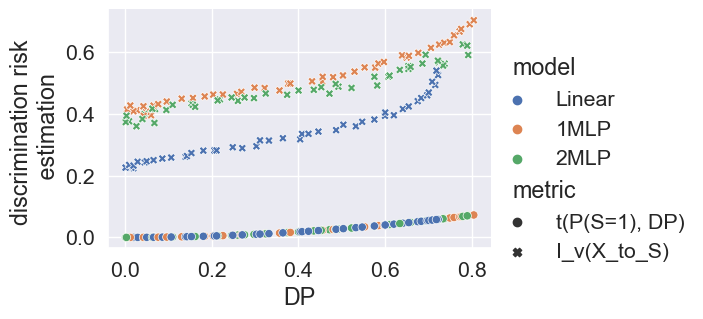

In [84]:
sns.set(font_scale=1.4)
sns.relplot(data=result_census_income, x='DP', y='discrimination risk \n estimation', style='metric', hue='model', height=3.5, aspect=1.5)

In [11]:
result_ds = pd.DataFrame()
for ds in ['census_income', 'dutch_census', 'compas']:
    for m in ['t(P(S=1), DP)', 'I_v(X_to_S)']:
        dataset = results[results['dataset']==ds]['dataset']
        model = results[results['dataset']==ds]['model']
        pr = results[results['dataset']==ds]['pr(Y=1|S=0)']
        dem_p = results[results['dataset']==ds]['DP']
        estimate = results[results['dataset']==ds][m]
        metric = [m]*len(results[results['dataset']==ds])
        result_ds = pd.concat([result_ds,
                                            pd.DataFrame({'dataset': dataset, 
                                                                        'model': model, 
                                                                        'pr(Y=1|S=0)': pr, 
                                                                        'DP': dem_p,
                                                                        'metric': metric,
                                                                        'discrimination risk \n estimation': estimate})], ignore_index=True)
    
result_ds['model']=result_ds['model'].replace('sgd_lr', 'Linear').replace('mlp_one_layer', '1MLP').replace('mlp_two_layer', '2MLP')

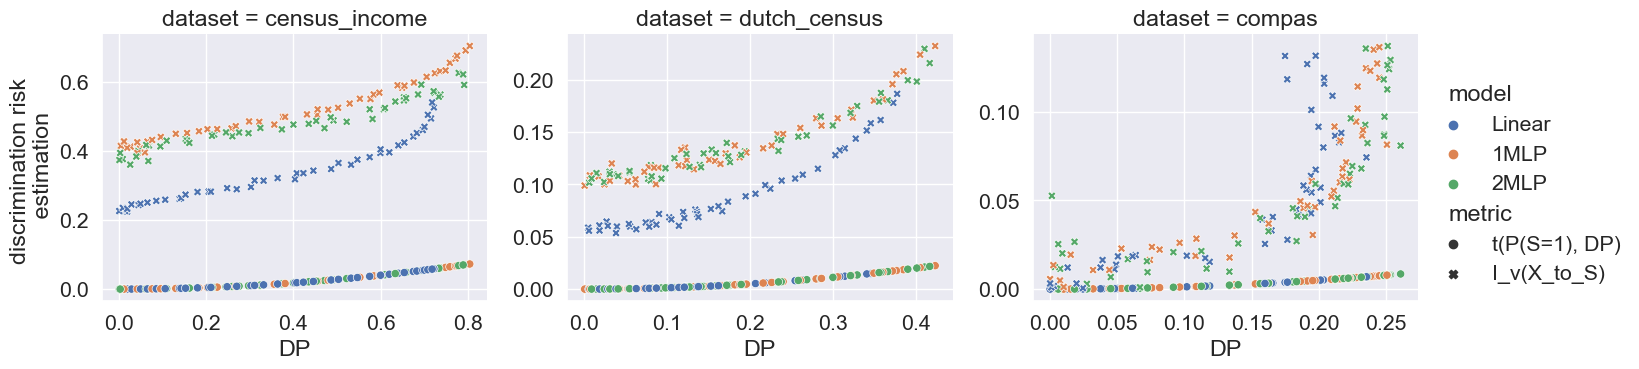

In [19]:
sns.set(font_scale=1.4)
sns.relplot(data=result_ds, x='DP', 
            y='discrimination risk \n estimation', 
            style='metric', 
            hue='model', 
            col='dataset', 
            facet_kws=dict(sharey=False, sharex=False),
            height=4, aspect=1.2)

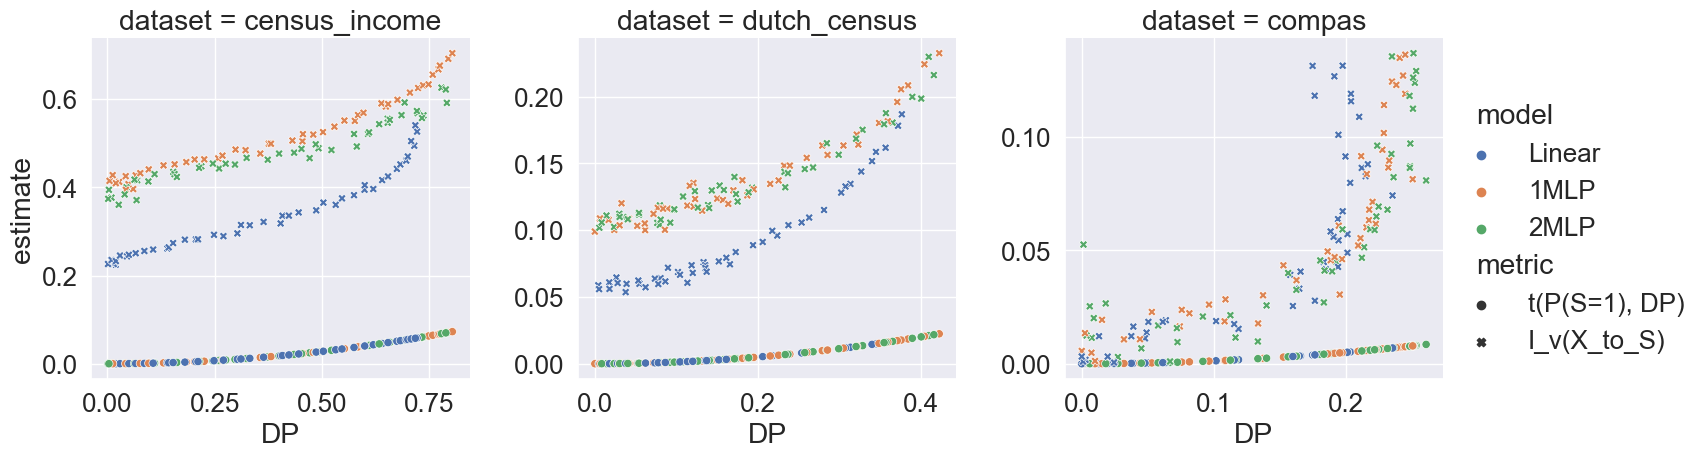

In [76]:
sns.set(font_scale=1.7)
sns.relplot(data=result_ds, x='DP', y='estimate', style='metric', hue='model', col='dataset', facet_kws=dict(sharey=False, sharex=False))